***Time series prediction using LSTM***

---
Let us look at another implementation of LSTM using Tensorflow Keras. Lets use a dataset called flights data available in seaborn package. You can import the dataset using the command:



```
seaborn.load_dataset
```
We will be using Flights dataset for this example.


In [ ]:
import pandas as pd
import tensorflow as tf
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = sns.load_dataset("flights")
print(data.shape)
data.head()


(144, 3)


year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

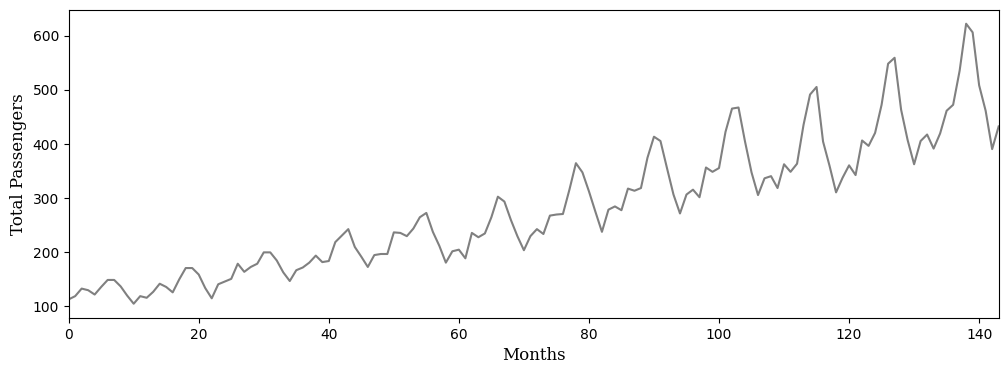

In [ ]:

plt.figure(figsize=(12,4))
csfont = {'fontname':'serif'}
plt.plot(data['passengers'],color='Grey')
plt.xlabel('Months',fontsize=12,**csfont)
plt.ylabel('Total Passengers',fontsize=12,**csfont)
plt.autoscale(axis='x',tight=True)
#plt.grid(True)
plt.savefig('flights_Data.pdf')
plt.show()

In [ ]:
class Data_processing():

  def __init__(self, data, splitr=30):#, url, n_steps, percent_Split = 0.8):
    #self.url = url
    self.split_range = splitr
    self.data = data

# Parameter split_percent defines the ratio of training examples
  def get_train_test(self):
      n = len(data)
      # Point for splitting data into train and test
      split = int(self.split_range)
      train_data = self.data[:-split]
      test_data = self.data[-split:]
      scaler = MinMaxScaler()
      self.train_data = scaler.fit_transform(train_data.reshape(-1,1))
      self.test_data = scaler.transform(test_data.reshape(-1,1))
      n = len(data)
      return self.train_data, self.test_data, scaler #, self.data

  def XY_split_sequence(self,seq,ws):
      win = []
      lab = []
      L = len(seq)

      for i in range(L-ws):
        window = seq[i:i+ws,]
        label = seq[i+ws:i+ws+1]
        win.append(window)
        lab.append(label)

      return np.array(win), np.array(lab)

In [ ]:
data1=data['passengers'].values.astype(float)
data_module = Data_processing(data1, 30)

In [ ]:
train, test, sc = data_module.get_train_test()
window_size=12
trainX, trainY = data_module.XY_split_sequence(train,window_size)
testX, testY = data_module.XY_split_sequence(test,window_size)

In [ ]:
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(102, 12, 1) (102, 1, 1) (18, 12, 1) (18, 1, 1)


In [ ]:
def input_data(seq,ws):
  win = []
  lab = []
  L = len(seq)

  for i in range(L-ws):
      window = seq[i:i+ws,]
      label = seq[i+ws:i+ws+1]
      win.append(window)
      lab.append(label)

  return win, lab

In [ ]:
class Model_setup():
  def __init__(self, hidden_units, dense_units, input_shape, activation, optimizer, loss):
    self.hidden_units = hidden_units
    self.dense_units = dense_units
    self.input_shape = input_shape
    self.activation = activation
    self.loss = loss
    self.optimizer = optimizer
    self.model = tf.keras.Sequential()

  def create_LSTMmodel(self):

    self.model.add(tf.keras.layers.LSTM(self.hidden_units, input_shape=self.input_shape))#, activation=self.activation[0]))
    self.model.add(tf.keras.layers.Dense(units=self.dense_units))#, activation=self.activation[1]))
    #model.compile(loss='mean_squared_error', optimizer='adam')
    self.model.compile(loss=self.loss, optimizer=self.optimizer)
    return self.model

  def LSTMmodel_training(self, epochs, batch_size, trainX, trainY):
    history = self.model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=1)
    return self.model, history

In [ ]:
model = Model_setup(hidden_units=4, dense_units=1, input_shape=(window_size,1),
                   activation=['tanh', 'tanh'], optimizer='Adam', loss = 'mean_squared_error')
LSTM_model = model.create_LSTMmodel()


In [ ]:
LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 96        
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
LSTM_model, history = model.LSTMmodel_training(epochs=1000,batch_size=64,trainX = trainX, trainY = trainY)

Epoch 1/1000
2/2 [==============================] - 3s 19ms/step - loss: 0.2973
Epoch 2/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2870
Epoch 3/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2770
Epoch 4/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2676
Epoch 5/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.2577
Epoch 6/1000
2/2 [==============================] - 0s 11ms/step - loss: 0.2482
Epoch 7/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2391
Epoch 8/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2305
Epoch 9/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.2218
Epoch 10/1000
2/2 [==============================] - 0s 11ms/step - loss: 0.2135
Epoch 11/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2051
Epoch 12/1000
2/2 [==============================] - 0s 11ms/step - loss: 0.1973
Epoch 13/1000
2/2 [==================

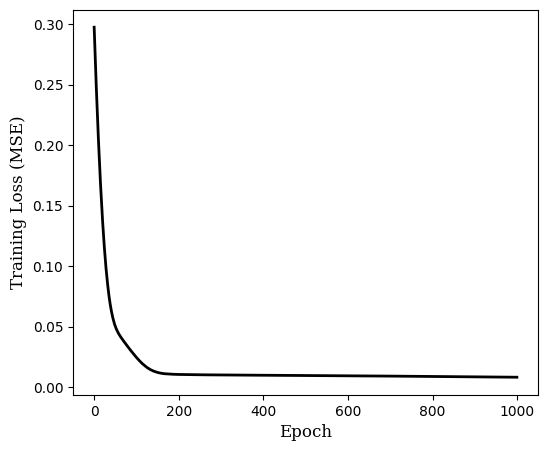

In [ ]:
plt.figure(figsize=(6,5))
csfont = {'fontname':'serif'}

plt.plot(history.history['loss'], lw=2,color='k')
plt.xlabel("Epoch",fontsize=12,**csfont)
plt.ylabel("Training Loss (MSE)",fontsize=12,**csfont)
plt.savefig('train_loss_lstm.pdf')
plt.show()





In [ ]:
data_predict = LSTM_model.predict(testX)

1/1 [==============================] - 0s 427ms/step


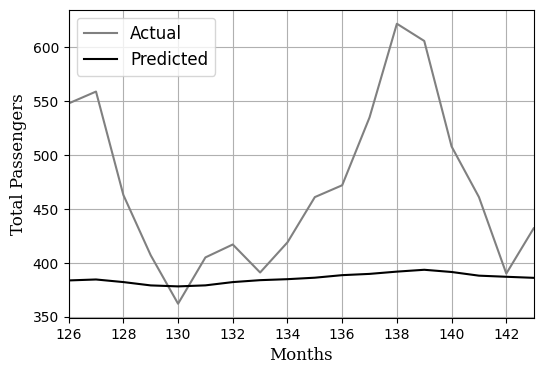

In [ ]:
data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(testY.reshape(-1,1))
plt.figure(figsize=(6,4))
x = np.arange(126, 144, 1)
csfont = {'fontname':'serif'}
plt.plot(x,dataY_plot,color='Grey',label='Actual')
plt.plot(x,data_predict,color='Black',label='Predicted')
plt.xlabel('Months',fontsize=12,**csfont)
plt.ylabel('Total Passengers',fontsize=12,**csfont)
plt.autoscale(axis='x',tight=True)
plt.grid()
plt.legend(fontsize=12)
plt.savefig('predlstm.pdf')
plt.show()